In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

## Benchmark against Tim's website
- https://filedn.com/lU1GlyFhv3UuXg5E9dbnWFF/TJBHpages/hbpl.html
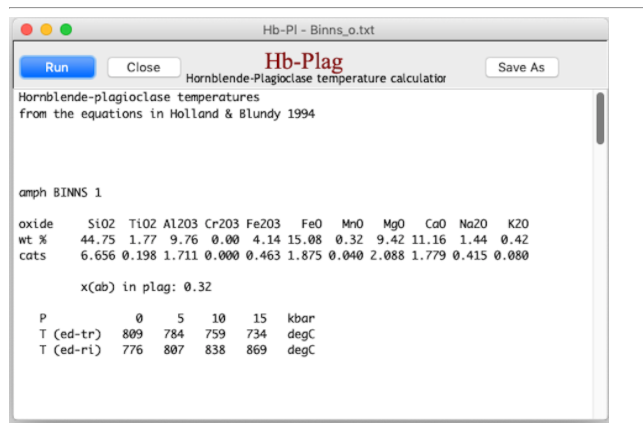

In [2]:
Amp_Tim=pd.DataFrame(data={'SiO2_Amp': 44.75,
                          'TiO2_Amp':1.77,
                          'Al2O3_Amp':9.76,
                          'Cr2O3_Amp':0,
                          'FeOt_Amp':4.14*0.8998+15.08,
                           'MnO_Amp': 0.32,
                           'MgO_Amp':9.42,
                           'CaO_Amp':11.16,
                           'Na2O_Amp':1.44,
                           'K2O_Amp':0.42,
                          }, index=[0])

In [3]:
Thermobar_Tim_0=pt.calculate_amp_plag_temp(amp_comps=Amp_Tim, XAb=0.32, XAn=1-0.32,
                                       equationT="T_HB1994_A", P=0)-273.1
Thermobar_Tim_0

0    809.708451
dtype: float64

In [4]:
Thermobar_Tim_15=pt.calculate_amp_plag_temp(amp_comps=Amp_Tim, XAb=0.32, XAn=1-0.32,
                                       equationT="T_HB1994_A", P=15)-273.1
Thermobar_Tim_15

0    734.379072
dtype: float64

In [5]:
## Benchmarking against the RIPG spreadsheet from Anderson, where specify An and Ab

In [6]:
Test_in=pt.import_excel('Holland_Blundy_RiMG069_Benchmark.xlsx', 
                        sheet_name='Thermobar_format')
Amps=Test_in['Amps']
Plags=Test_in['Plags']
Amps_input=Test_in['my_input']

g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\import_export.py:378: UserWarning: You've got a column heading with a lower case _sp, this is okay if this column is for your own use, but if its an input to Thermobar, it needs to be capitalized (_Sp)
  w.warn("You've got a column heading with a lower case _sp, this is okay if this column is for your"


In [7]:
Amps

,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp
0,40.70,3.04,14.00,10.60,0.13,14.70,11.90,2.74,0.46,0.0,0.0,0.0,0
1,39.80,2.72,13.60,11.40,0.14,14.20,12.00,2.67,0.49,0.0,0.0,0.0,1
2,41.30,3.17,13.40,11.20,0.16,13.70,11.80,2.77,0.49,0.0,0.0,0.0,2
3,41.10,2.71,13.40,13.00,0.19,13.40,11.60,2.76,0.46,0.0,0.0,0.0,3
4,42.40,2.75,12.70,10.00,0.15,15.10,11.80,2.39,0.82,0.0,0.0,0.0,4
5,42.00,2.62,13.10,10.80,0.20,14.60,11.70,2.52,0.73,0.0,0.0,0.0,5
6,48.66,0.64,5.84,14.31,0.89,14.39,11.66,1.24,0.59,0.0,0.0,0.0,6
7,48.59,0.60,5.20,13.68,0.87,14.49,11.06,1.11,0.56,0.0,0.0,0.0,7


In [8]:
Thermobar_Tim_0=pt.calculate_amp_plag_temp(amp_comps=Amps, XAb=0.32, XAn=1-0.32,
                                       equationT="T_HB1994_A", P=0)-273.1
Thermobar_Tim_0

0    1188.605543
1    1266.798143
2    1093.889532
3    1141.338137
4    1053.586219
5    1066.390599
6     844.719283
7     797.622358
dtype: float64

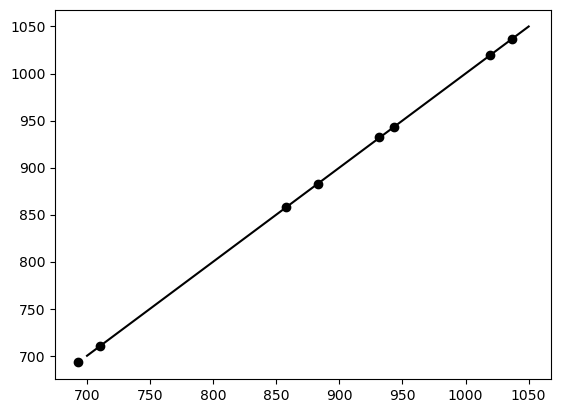

In [9]:
## 
Thermobar_A=pt.calculate_amp_plag_temp(amp_comps=Amps, XAb=Amps_input['XAb'], XAn=1-Amps_input['XAb'],
                                       equationT="T_HB1994_A", P=2)-273.15
plt.plot(Amps_input['Ta_Spreadsheet'],Thermobar_A, 'ok')
plt.plot([700, 1050], [700, 1050], '-k')

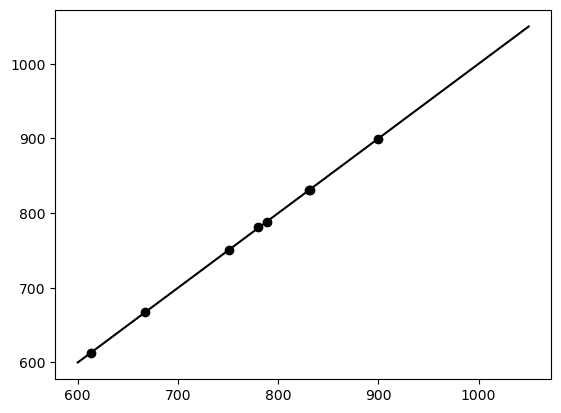

In [10]:
## Benchmark against RIPG spreadsheet from Anderson, where specify An and Ab
Thermobar_B=pt.calculate_amp_plag_temp(amp_comps=Amps, XAb=Amps_input['XAb'], XAn=1-Amps_input['XAb'],
                                       equationT="T_HB1994_B", P=2)-273.15
plt.plot(Amps_input['Tb_spreadsheet'],Thermobar_B, 'ok')
plt.plot([600, 1050], [600, 1050], '-k')

## Matching algorithm

In [11]:
pt.calculate_amp_plag_temp_matching(amp_comps=Amps, plag_comps=Plags, equationT="T_HB1994_B", P=5)

Considering N=8 Amp & N=8 Plags, which is a total of N=64 Plag-Amp pairs, be patient if this is >>1 million!


,T_K_calc,Sample_ID_Plag,Sample_ID_Amp,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Si_Plag_cat_prop,Mg_Plag_cat_prop,Fet_Plag_cat_prop,Ca_Plag_cat_prop,Al_Plag_cat_prop,Na_Plag_cat_prop,K_Plag_cat_prop,Mn_Plag_cat_prop,Ti_Plag_cat_prop,Cr_Plag_cat_prop,sum,Si_Plag_cat_frac,Mg_Plag_cat_frac,Fet_Plag_cat_frac,Ca_Plag_cat_frac,Al_Plag_cat_frac,Na_Plag_cat_frac,K_Plag_cat_frac,Mn_Plag_cat_frac,Ti_Plag_cat_frac,Cr_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,ID_Plag,Si_Amp_cat_23ox,Mg_Amp_cat_23ox,Fet_Amp_cat_23ox,Ca_Amp_cat_23ox,Al_Amp_cat_23ox,Na_Amp_cat_23ox,K_Amp_cat_23ox,Mn_Amp_cat_23ox,Ti_Amp_cat_23ox,Cr_Amp_cat_23ox,oxy_renorm_factor,cation_sum_Si_Mg,cation_sum_Si_Ca,cation_sum_All,Mgno_Amp,ID_Amp
0,1286.392573,0,0,46.8,0.0,34.2,0.77,0.0,0.08,17.1,1.61,0.05,0.0,0.778906,0.001985,0.010717,0.304936,0.670845,0.051953,0.001062,0.0,0.0,0.0,1.820403,0.427875,0.001090,0.005887,0.167510,0.368514,0.028539,0.000583,0.0,0.0,0.0,0.851894,0.145141,0.002966,0,5.950583,3.203989,1.296066,1.864169,2.412404,0.776717,0.085799,0.016099,0.334324,0.0,0.0,13.213464,15.077633,15.940149,0.711989,0
1,1264.173705,1,0,47.4,0.0,33.0,0.79,0.0,0.09,16.6,2.04,0.07,0.0,0.788892,0.002233,0.010996,0.296019,0.647306,0.065829,0.001486,0.0,0.0,0.0,1.812761,0.435188,0.001232,0.006066,0.163298,0.357083,0.036314,0.000820,0.0,0.0,0.0,0.814730,0.181180,0.004091,1,5.950583,3.203989,1.296066,1.864169,2.412404,0.776717,0.085799,0.016099,0.334324,0.0,0.0,13.213464,15.077633,15.940149,0.711989,0
2,1256.377334,2,0,48.2,0.0,32.3,0.58,0.0,0.04,16.0,2.18,0.06,0.0,0.802206,0.000992,0.008073,0.285320,0.633576,0.070347,0.001274,0.0,0.0,0.0,1.801787,0.445228,0.000551,0.004480,0.158354,0.351637,0.039043,0.000707,0.0,0.0,0.0,0.799349,0.197082,0.003569,2,5.950583,3.203989,1.296066,1.864169,2.412404,0.776717,0.085799,0.016099,0.334324,0.0,0.0,13.213464,15.077633,15.940149,0.711989,0
3,1220.914229,3,0,50.9,0.0,31.0,0.59,0.0,0.07,14.2,3.38,0.07,0.0,0.847143,0.001737,0.008212,0.253221,0.608076,0.109069,0.001486,0.0,0.0,0.0,1.828945,0.463187,0.000950,0.004490,0.138452,0.332474,0.059635,0.000813,0.0,0.0,0.0,0.696090,0.299825,0.004086,3,5.950583,3.203989,1.296066,1.864169,2.412404,0.776717,0.085799,0.016099,0.334324,0.0,0.0,13.213464,15.077633,15.940149,0.711989,0
4,1283.557071,4,0,46.9,0.0,32.9,0.70,0.0,0.10,17.1,1.66,0.11,0.0,0.780570,0.002481,0.009743,0.304936,0.645345,0.053567,0.002336,0.0,0.0,0.0,1.798977,0.433897,0.001379,0.005416,0.169505,0.358729,0.029776,0.001298,0.0,0.0,0.0,0.845077,0.148451,0.006473,4,5.950583,3.203989,1.296066,1.864169,2.412404,0.776717,0.085799,0.016099,0.334324,0.0,0.0,13.213464,15.077633,15.940149,0.711989,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1096.476448,3,7,50.9,0.0,31.0,0.59,0.0,0.07,14.2,3.38,0.07,0.0,0.847143,0.001737,0.008212,0.253221,0.608076,0.109069,0.001486,0.0,0.0,0.0,1.828945,0.463187,0.000950,0.004490,0.138452,0.332474,0.059635,0.000813,0.0,0.0,0.0,0.696090,0.299825,0.004086,3,7.241078,3.219091,1.704898,1.765975,0.913307,0.32072,0.106464,0.109815,0.067257,0.0,0.0,13.255445,15.02142,15.448604,0.653757,7
60,1156.881496,4,7,46.9,0.0,32.9,0.70,0.0,0.10,17.1,1.66,0.11,0.0,0.780570,0.002481,0.009743,0.304936,0.645345,0.053567,0.002336,0.0,0.0,0.0,1.798977,0.433897,0.001379,0.005416,0.169505,0.358729,0.029776,0.001298,0.0,0.0,0.0,0.845077,0.148451,0.006473,4,7.241078,3.219091,1.704898,1.765975,0.913307,0.32072,0.106464,0.109815,0.067257,0.0,0.0,13.255445,15.02142,15.448604,0.653757,7
61,1135.83866,5,7,47.8,0.0,33.0,0.63,0.0,0.09,16.4,2.06,0.12,0.0,0.795549,0.002233,0.008769,0.292453,0.647306,0.066474,0.002548,0.0,0.0,0.0,1.815332,0.438239,0.001230,0.004830,0.161102,0.356577,0.036618,0.001404,0.0,0.0,0.0,0.809054,0.183897,0.007049,5,7.241078,3.219091,1.704898,1.765975,0.913307,0.32072,0.106464,0.109815,0.067257,0.0,0.0,13.2

In [12]:
# Adding an ID label to help with melt-Amp rematching later

amp_comps=Amps
plag_comps=Plags
myAmps1_concat=pt.calculate_23oxygens_amphibole(amp_comps=amp_comps)
myPlag_concat=pt.calculate_cat_fractions_plagioclase(plag_comps=plag_comps)

myAmps1_concat['ID_Amp'] = myAmps1_concat.index
if "Sample_ID_Amp" not in amp_comps:
    myAmps1_concat['Sample_ID_Amp'] = myAmps1_concat.index
else:
    myAmps1_concat['Sample_ID_Amp']=amp_comps['Sample_ID_Amp']

if "Sample_ID_Plag" not in plag_comps:
    myPlag_concat['Sample_ID_Plag'] = myPlag_concat.index
else:
    myPlag_concat['Sample_ID_Plag']=plag_comps['Sample_ID_Plag']

myAmps1_concat['ID_Amp']=myAmps1_concat.index
myPlag_concat['ID_Plag'] = myPlag_concat.index


# This duplicates Amps, repeats Amp1-Amp1*N, Amp2-Amp2*N etc.
DupAmps = pd.DataFrame(np.repeat(myAmps1_concat.values,
np.shape(myPlag_concat)[0], axis=0))
DupAmps.columns = myAmps1_concat.columns

# This duplicates Plaguids like Plag1-Plag2-Plag3 for Amp1, Plag1-Plag2-Plag3 for
# Amp2 etc.
DupPlags = pd.concat([myPlag_concat] *
                    np.shape(myAmps1_concat)[0]).reset_index(drop=True)

# Combines these merged Plaguids and Amp dataframes
Combo_Plag_Amps = pd.concat([DupPlags, DupAmps], axis=1)
LenCombo = str(np.shape(Combo_Plag_Amps)[0])

# Status update for user
LenAmp=len(amp_comps)
LenPlags=len(plag_comps)
print("Considering N=" + str(LenAmp) + " Amp & N=" + str(LenPlags) +" Plags, which is a total of N="+ str(LenCombo) +
        " Plag-Amp pairs, be patient if this is >>1 million!")



Considering N=8 Amp & N=8 Plags, which is a total of N=64 Plag-Amp pairs, be patient if this is >>1 million!


In [13]:
Combo_Plag_Amps.columns

Index(['SiO2_Plag', 'TiO2_Plag', 'Al2O3_Plag', 'FeOt_Plag', 'MnO_Plag',
       'MgO_Plag', 'CaO_Plag', 'Na2O_Plag', 'K2O_Plag', 'Cr2O3_Plag',
       'Sample_ID_Plag', 'Si_Plag_cat_prop', 'Mg_Plag_cat_prop',
       'Fet_Plag_cat_prop', 'Ca_Plag_cat_prop', 'Al_Plag_cat_prop',
       'Na_Plag_cat_prop', 'K_Plag_cat_prop', 'Mn_Plag_cat_prop',
       'Ti_Plag_cat_prop', 'Cr_Plag_cat_prop', 'sum', 'Si_Plag_cat_frac',
       'Mg_Plag_cat_frac', 'Fet_Plag_cat_frac', 'Ca_Plag_cat_frac',
       'Al_Plag_cat_frac', 'Na_Plag_cat_frac', 'K_Plag_cat_frac',
       'Mn_Plag_cat_frac', 'Ti_Plag_cat_frac', 'Cr_Plag_cat_frac', 'An_Plag',
       'Ab_Plag', 'Or_Plag', 'ID_Plag', 'Si_Amp_cat_23ox', 'Mg_Amp_cat_23ox',
       'Fet_Amp_cat_23ox', 'Ca_Amp_cat_23ox', 'Al_Amp_cat_23ox',
       'Na_Amp_cat_23ox', 'K_Amp_cat_23ox', 'Mn_Amp_cat_23ox',
       'Ti_Amp_cat_23ox', 'Cr_Amp_cat_23ox', 'oxy_renorm_factor',
       'cation_sum_Si_Mg', 'cation_sum_Si_Ca', 'cation_sum_All', 'Mgno_Amp',
       'ID_Amp', 'Sample

In [14]:
Amps2=Amps.loc[Amps['SiO2_Amp']>46]
Amps2

,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp
6,48.66,0.64,5.84,14.31,0.89,14.39,11.66,1.24,0.59,0.0,0.0,0.0,6
7,48.59,0.60,5.20,13.68,0.87,14.49,11.06,1.11,0.56,0.0,0.0,0.0,7


## Using input plags and amps

In [15]:
## Benchmark against RIPG spreadsheet from Anderson, where specify An and Ab
Thermobar_B_input=pt.calculate_amp_plag_temp(amp_comps=Amps, plag_comps=Plags,
                                       equationT="T_HB1994_B", P=5)-273.15
Thermobar_A_input=pt.calculate_amp_plag_temp(amp_comps=Amps, plag_comps=Plags,
                                       equationT="T_HB1994_A", P=5)-273.15

In [16]:
## Benchmark against RIPG spreadsheet from Anderson, where specify An and Ab
Plags.head()
An=pt.calculate_cat_fractions_plagioclase(plag_comps=Plags).An_Plag
Ab=pt.calculate_cat_fractions_plagioclase(plag_comps=Plags).Ab_Plag

Thermobar_B_input_An=pt.calculate_amp_plag_temp(amp_comps=Amps, XAn=An, XAb=Ab,
                                       equationT="T_HB1994_B", P=5)-273.15
Thermobar_A_input_An=pt.calculate_amp_plag_temp(amp_comps=Amps, XAn=An, XAb=Ab,
                                       equationT="T_HB1994_A", P=5)-273.15

### First, show these are the same (input plag, input An)

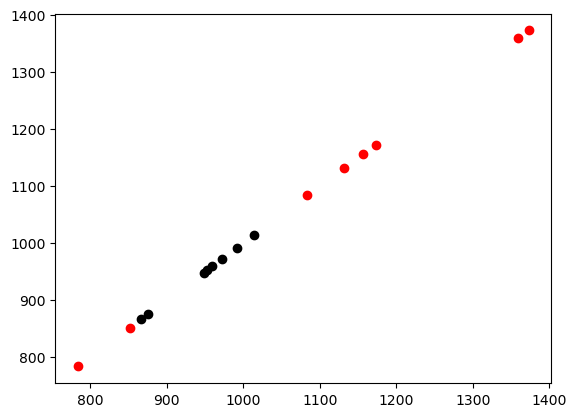

In [17]:
plt.plot(Thermobar_B_input_An, Thermobar_B_input, 'ok')
plt.plot(Thermobar_A_input_An, Thermobar_A_input, 'or')


## Compare to spreadsheet
- Original spreadsheet does Xan -Xab wrong

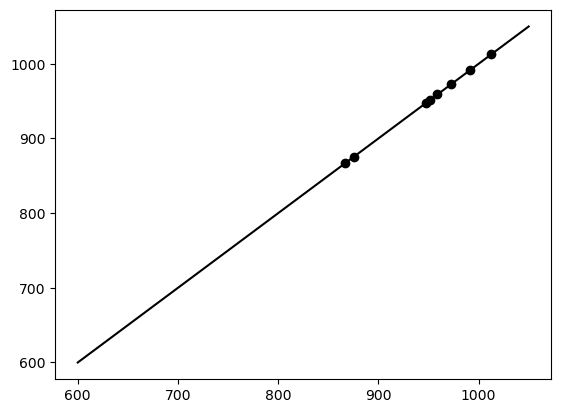

In [18]:
plt.plot(Amps_input['Tb_spreadsheet2'],Thermobar_B_input, 'ok')
plt.plot([600, 1050], [600, 1050], '-k')

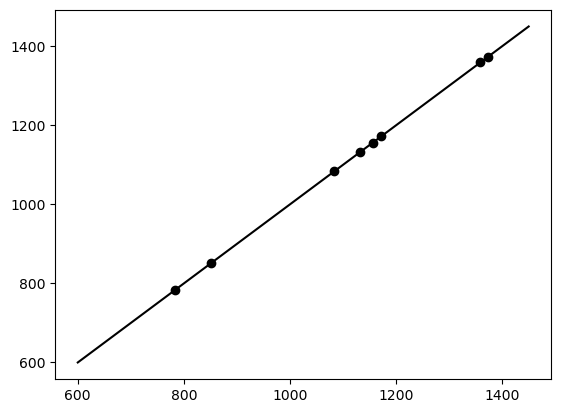

In [19]:
plt.plot(Amps_input['Ta_spreadsheet2'], Thermobar_A_input, 'ok')
plt.plot([600, 1450], [600, 1450], '-k')